<a href="https://colab.research.google.com/github/KarinaZubko/Portfolio/blob/main/E_Commerce_Shipping/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [ ]:
df = pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## **Exploratory Data Analysis**

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Weight_in_gms'>

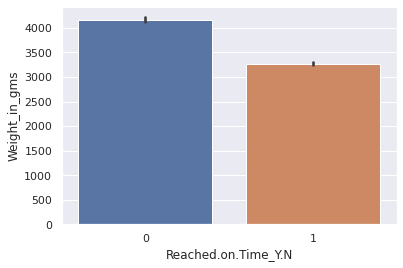

In [ ]:
sns.barplot(data=df, x="Reached.on.Time_Y.N", y="Weight_in_gms")
#Heavy weight items are most likely to be late than light weight items

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered'>

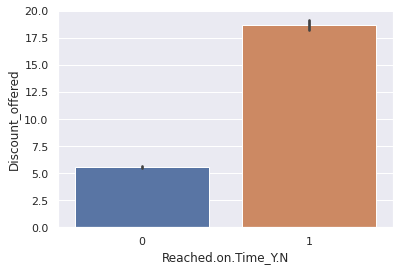

In [ ]:
sns.barplot(data=df, x="Reached.on.Time_Y.N", y="Discount_offered")
#Because the huge discount offered are ontime, we have to make campaign to give more discount on product

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='Cost_of_the_Product'>

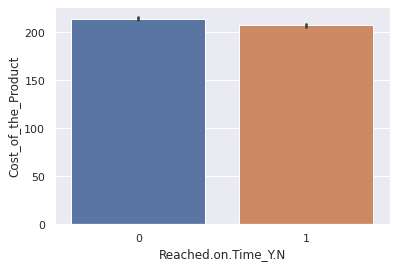

In [ ]:
sns.barplot(data=df, x="Reached.on.Time_Y.N", y="Cost_of_the_Product")

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='count'>

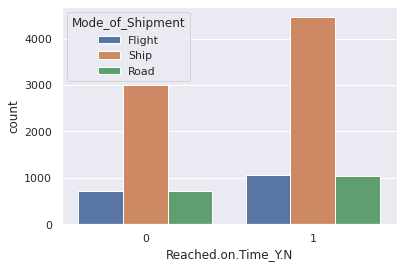

In [ ]:
sns.countplot(data=df, x="Reached.on.Time_Y.N", hue="Mode_of_Shipment")

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='count'>

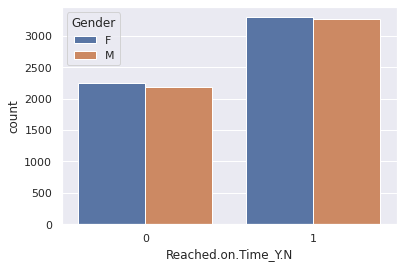

In [ ]:
sns.countplot(data=df, x="Reached.on.Time_Y.N", hue="Gender")

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='count'>

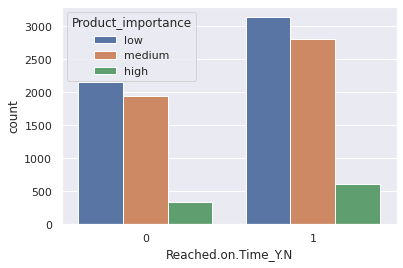

In [ ]:
sns.countplot(data=df, x="Reached.on.Time_Y.N", hue="Product_importance")

## **Data Preprocessing**

In [ ]:
df['Warehouse_block'].unique()

array([3, 4, 0, 1, 2])

In [ ]:
df['Mode_of_Shipment'].unique()

array([0, 2, 1])

In [ ]:
df['Product_importance'].unique()

array([1, 2, 0])

In [ ]:
df['Gender'].unique()

array([0, 1])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Warehouse_block']= label_encoder.fit_transform(df['Warehouse_block'])
df['Warehouse_block'].unique()

array([3, 4, 0, 1, 2])

In [ ]:
df['Mode_of_Shipment']= label_encoder.fit_transform(df['Mode_of_Shipment'])
df['Mode_of_Shipment'].unique()

array([0, 2, 1])

In [ ]:
df['Product_importance']= label_encoder.fit_transform(df['Product_importance'])
df['Product_importance'].unique()

array([1, 2, 0])

In [ ]:
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([0, 1])

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


In [ ]:
#convert object data types column to integer
df['Warehouse_block'] = pd.to_numeric(df['Warehouse_block'])
df['Mode_of_Shipment'] = pd.to_numeric(df['Mode_of_Shipment'])
df['Product_importance'] = pd.to_numeric(df['Product_importance'])
df['Gender'] = pd.to_numeric(df['Gender'])
df.dtypes

ID                     int64
Warehouse_block        int64
Mode_of_Shipment       int64
Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance     int64
Gender                 int64
Discount_offered       int64
Weight_in_gms          int64
Reached.on.Time_Y.N    int64
dtype: object

## **Check the Outliers**

<AxesSubplot:xlabel='Cost_of_the_Product'>

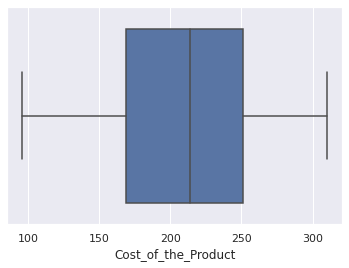

In [ ]:
sns.boxplot(x=df["Cost_of_the_Product"])

<AxesSubplot:xlabel='Discount_offered'>

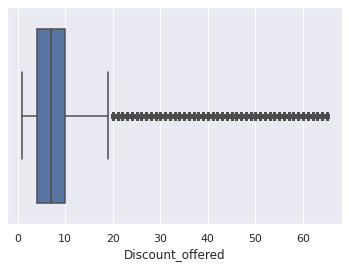

In [ ]:
sns.boxplot(x=df["Discount_offered"])

<AxesSubplot:xlabel='Weight_in_gms'>

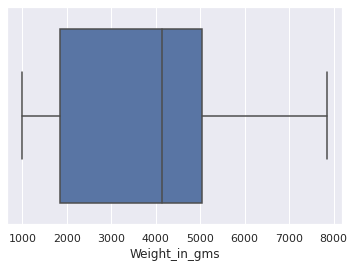

In [ ]:
sns.boxplot(x=df["Weight_in_gms"])

In [ ]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,0,1,1538,1
10995,10996,1,2,4,1,232,5,2,0,6,1247,0
10996,10997,2,2,5,4,242,5,1,0,4,1155,0
10997,10998,4,2,5,2,223,6,2,1,2,1210,0


## **Delete the Outlier Using Z-Score**

In [ ]:
import scipy.stats as stats
z = np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis = 1)] 
data_clean.shape

(10642, 12)

## **Balance the Class Value**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    6282
0    4360
Name: Reached.on.Time_Y.N, dtype: int64

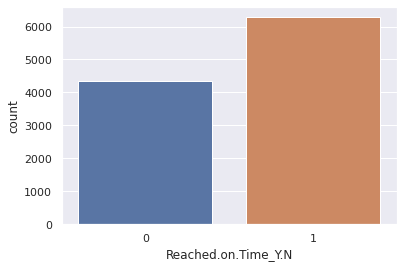

In [ ]:
#Counting 1 and 0 Value in stroke column
sns.countplot(data_clean['Reached.on.Time_Y.N'])
data_clean['Reached.on.Time_Y.N'].value_counts()

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data_clean[(data_clean['Reached.on.Time_Y.N']==1)] 
df_minority = data_clean[(data_clean['Reached.on.Time_Y.N']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 6282, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    6282
1    6282
Name: Reached.on.Time_Y.N, dtype: int64

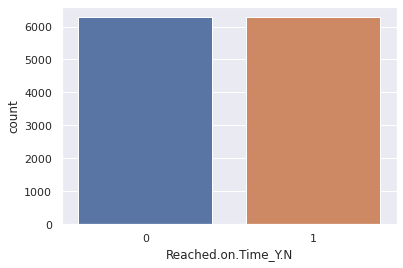

In [ ]:
sns.countplot(df_upsampled['Reached.on.Time_Y.N'])
df_upsampled['Reached.on.Time_Y.N'].value_counts()

<AxesSubplot:>

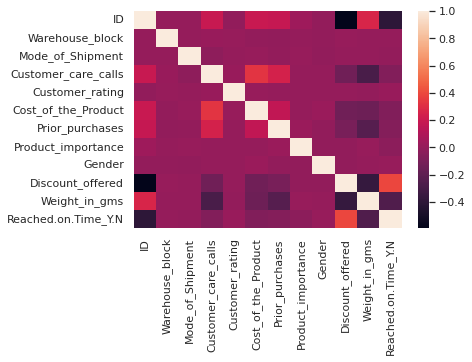

In [ ]:
sns.heatmap(data_clean.corr(), fmt='.2g')

## **Machine Learning Model Building**

In [ ]:
X = df_upsampled.drop('Reached.on.Time_Y.N', axis=1)
y = df_upsampled['Reached.on.Time_Y.N']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 77.64 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7717303005686433
Precision Score :  0.818260120585702
Recall Score :  0.7302075326671791


## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 74.81 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.7097661623108666
Precision Score :  0.8795454545454545
Recall Score :  0.5949269792467333


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 68.52 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.6379862700228833
Precision Score :  0.7884615384615384
Recall Score :  0.5357417371252883
